Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


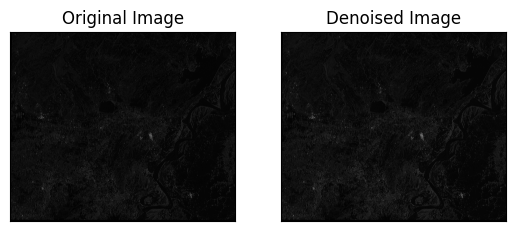

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/content/drive/MyDrive/Thatta TIFF.tif', 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

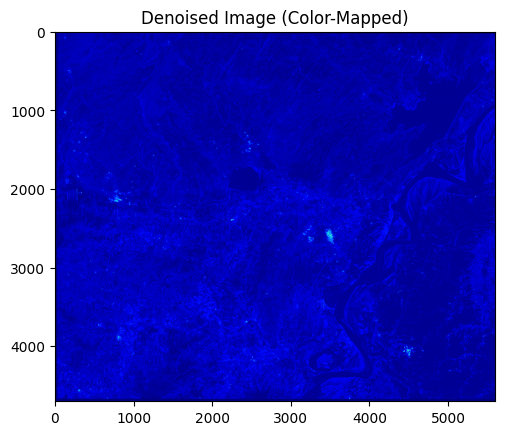

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/Thatta TIFF.tif', 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [6]:
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread('/content/drive/MyDrive/Thatta TIFF.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 5.704321618541034


In [7]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread('/content/drive/MyDrive/Thatta TIFF.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9403016136246216


In [8]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r'/content/drive/MyDrive/Thatta TIFF.tif', 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 11
Denoised pixel value at (150, 150): 12


Original Image Amplitude (Magnitude):
[[ 669.         2780.26909777 3104.50795737 ...  884.0024284
  3104.50795737 2780.26909777]
 [1360.75959833 5141.89631189 3168.12200615 ... 1766.17736655
  3303.57529514 5720.8073647 ]
 [4049.20341914 3360.60916196 1575.03086664 ... 1757.60983626
  2139.41467755 2435.29938679]
 ...
 [2980.76151451 2459.88155897 4477.91258589 ... 1111.20223502
  3279.67783188 4264.15847929]
 [4049.20341914 2435.29938679 2139.41467755 ...  129.59546947
  1575.03086664 3360.60916196]
 [1360.75959833 5720.8073647  3303.57529514 ... 3746.22376241
  3168.12200615 5141.89631189]]
Denoised Image Amplitude (Magnitude):
[[ 288.         1235.15997618 1589.73034795 ... 2791.28150974
  1589.73034795 1235.15997618]
 [ 777.10857498 1387.07532503 1167.28379191 ...  483.33159942
   848.85505384 1379.45280746]
 [ 709.79275626 2670.70317431  885.50614717 ... 1546.51665944
   681.82006093 1197.64327826]
 ...
 [1578.58433951 1153.98056177  255.31955738 ... 2053.68916786
  1793.17800226

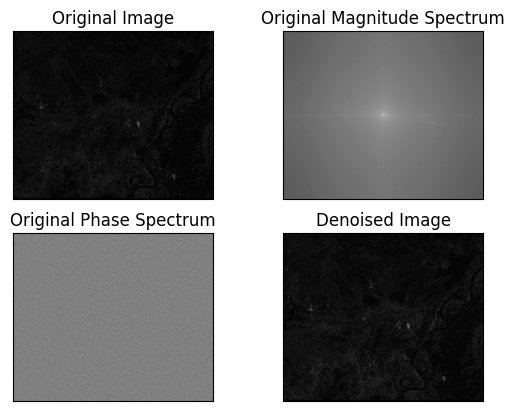

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r'/content/drive/MyDrive/Thatta TIFF.tif', 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")